In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier,  RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

# Set up visualisation preferences
sns.set(style="whitegrid")


In [2]:
data = pd.read_csv('bank_transactions_data_2.csv')


In [3]:
# Handling missing values
data.fillna(method='ffill', inplace=True)

# Convert data types if necessary, for example:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Removing outliers
q_low = data['TransactionAmount'].quantile(0.01)
q_hi  = data['TransactionAmount'].quantile(0.99)
data = data[(data['TransactionAmount'] > q_low) & (data['TransactionAmount'] < q_hi)]


<ipython-input-3-d05f24bc4a27>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


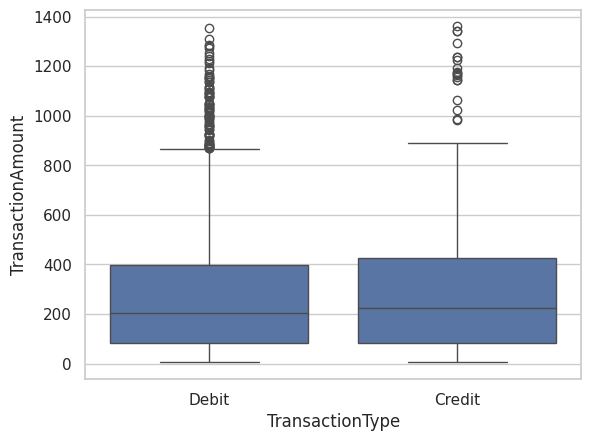

In [4]:
# Transaction amounts by type
sns.boxplot(x='TransactionType', y='TransactionAmount', data=data)
plt.show()

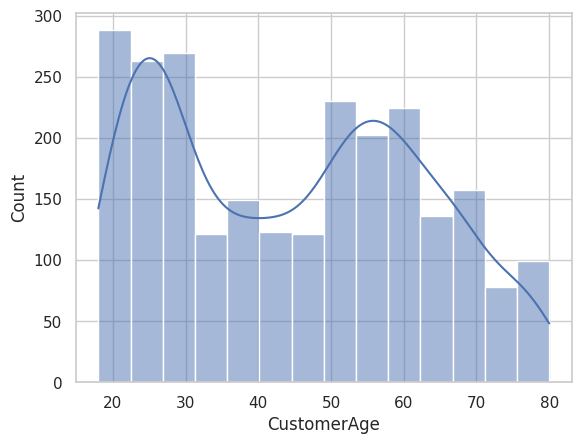

In [5]:
# Customer age distribution
sns.histplot(data['CustomerAge'], kde=True)
plt.show()


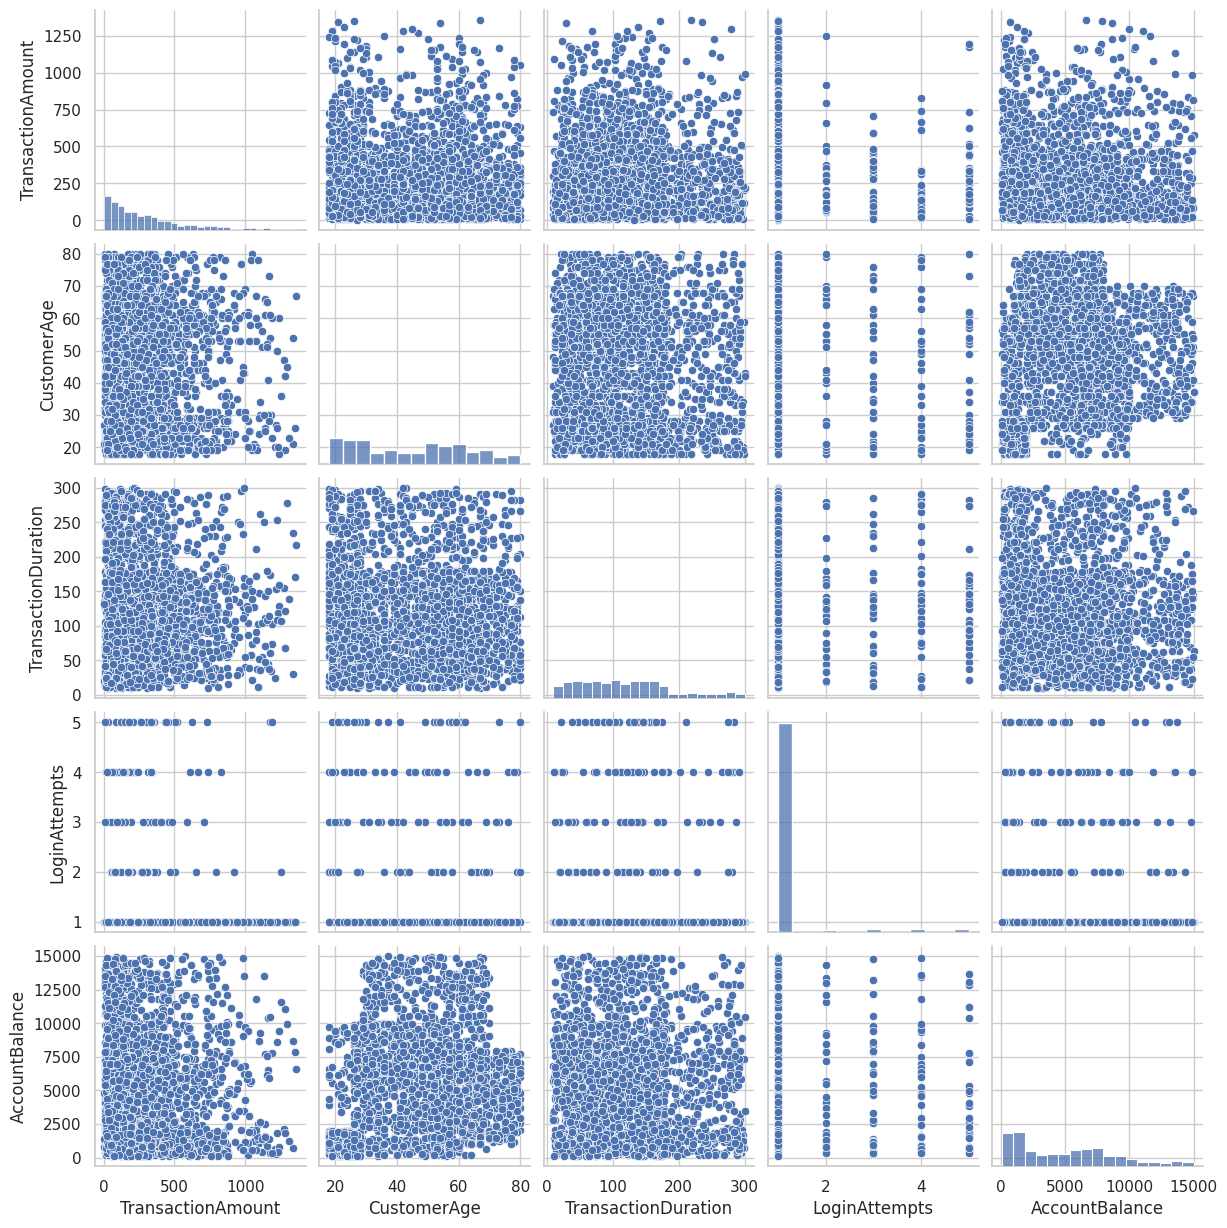

In [6]:
# Pairplot to visualize the relationships between numerical variables
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()

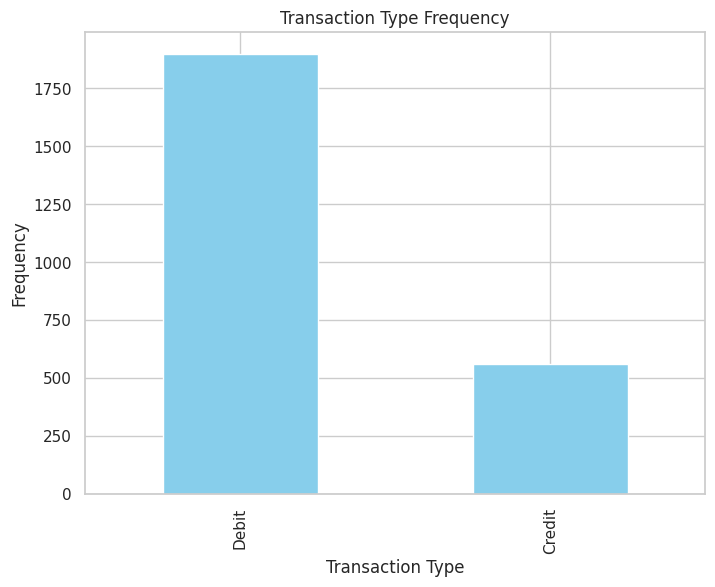

In [7]:
# Bar chart for categorical data
fig, ax = plt.subplots(figsize=(8, 6))
data['TransactionType'].value_counts().plot(kind='bar', color='skyblue')
ax.set_title('Transaction Type Frequency')
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Frequency')
plt.show()

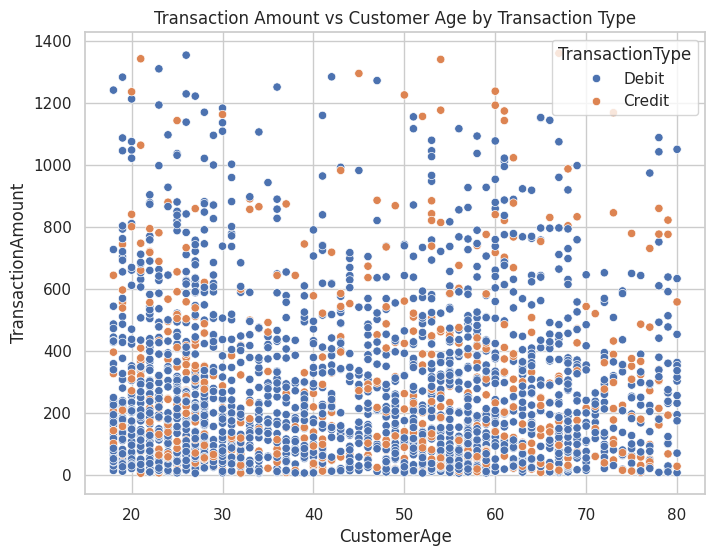

In [8]:
# Scatter plot to visualize two variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustomerAge', y='TransactionAmount', hue='TransactionType', data=data)
plt.title('Transaction Amount vs Customer Age by Transaction Type')
plt.show()

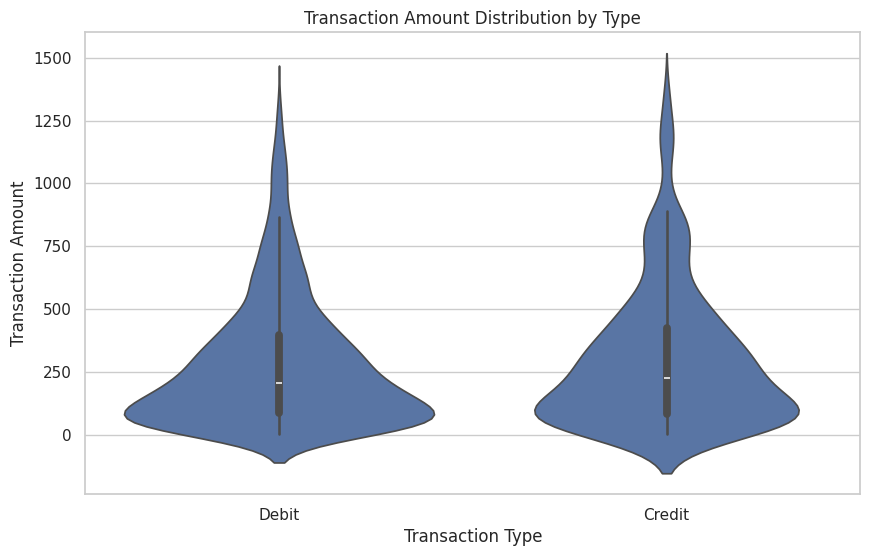

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='TransactionType', y='TransactionAmount', data=data)
plt.title('Transaction Amount Distribution by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()


<ipython-input-10-8973a12f6c07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustomerOccupation', data=data, palette='Set2')


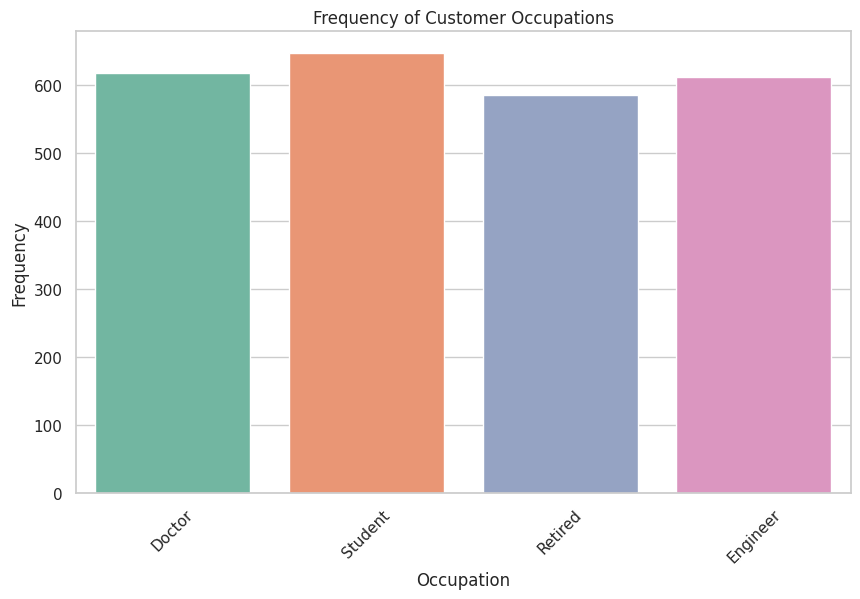

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CustomerOccupation', data=data, palette='Set2')
plt.title('Frequency of Customer Occupations')
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()


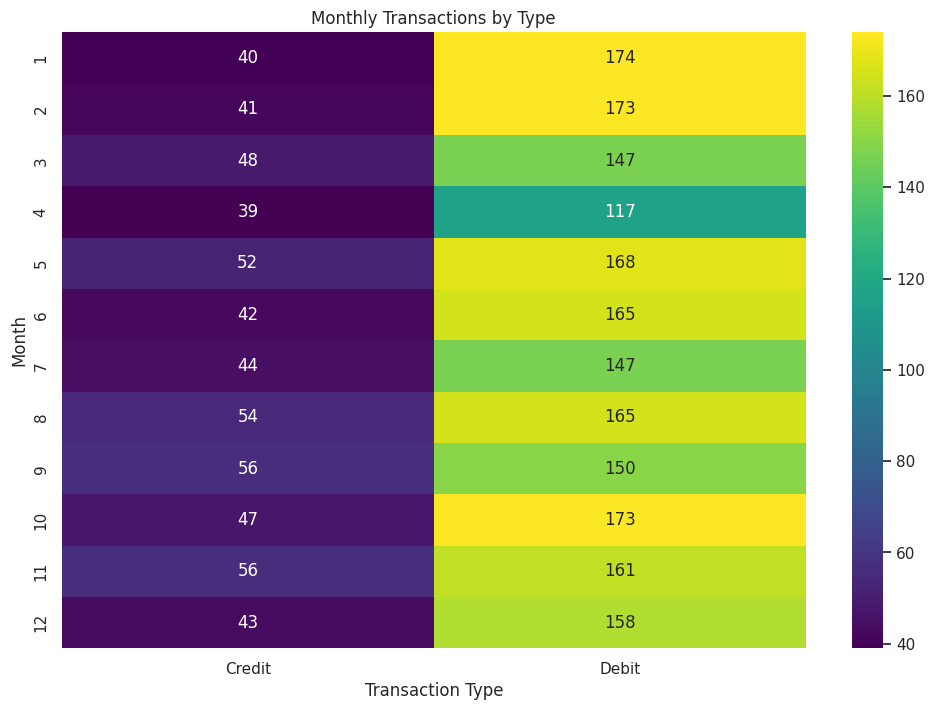

In [11]:
# Creating a new DataFrame for time series analysis
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.month
time_series_df = data.groupby(['Month', 'TransactionType']).size().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(time_series_df, annot=True, fmt="d", cmap='viridis')
plt.title('Monthly Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Month')
plt.show()


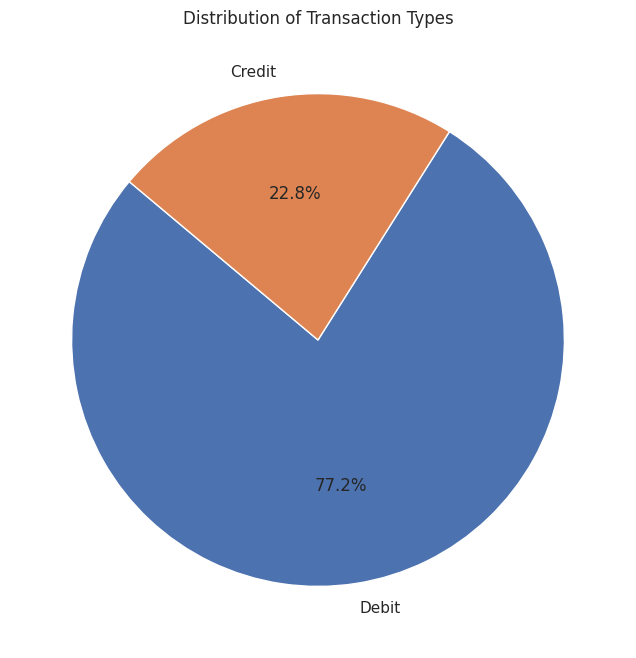

In [12]:
transaction_types = data['TransactionType'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(transaction_types, labels=transaction_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transaction Types')
plt.show()


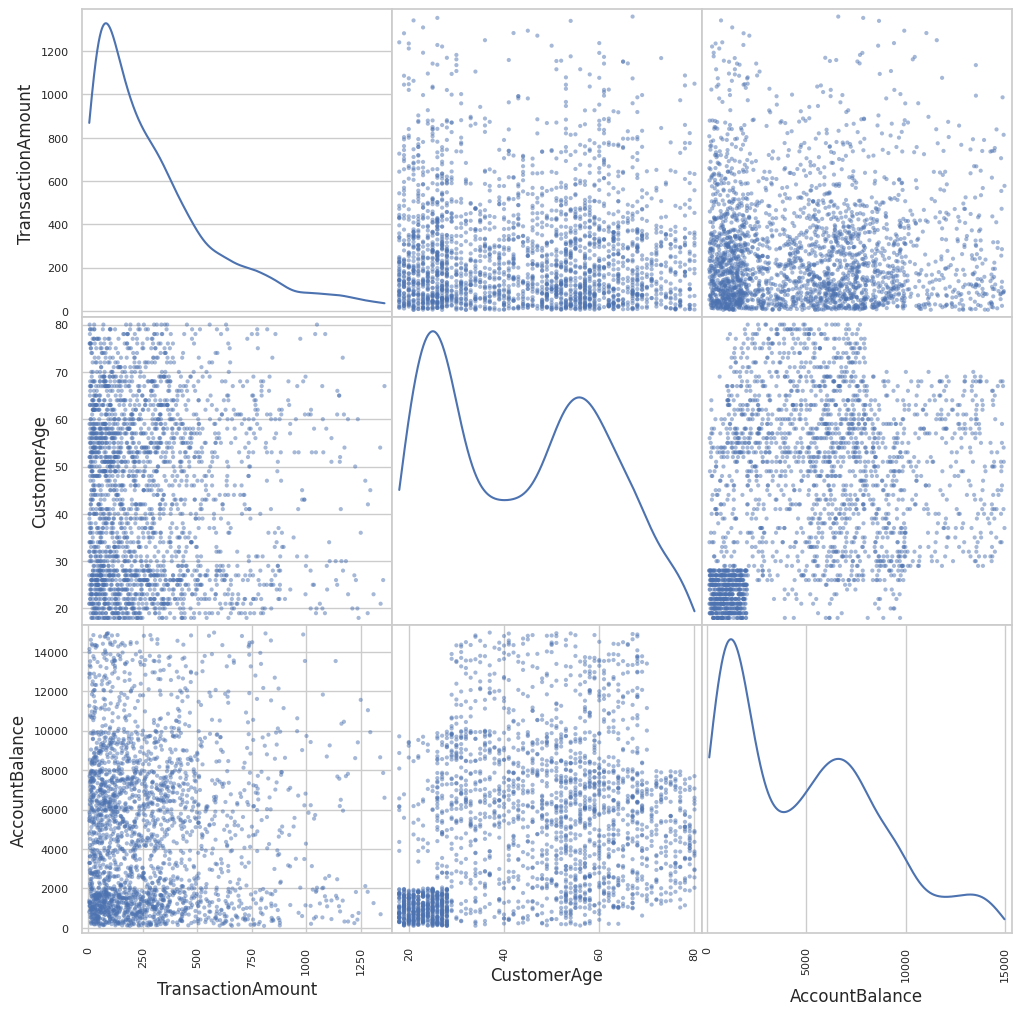

In [13]:
from pandas.plotting import scatter_matrix

numeric_cols = ['TransactionAmount', 'CustomerAge', 'AccountBalance']
scatter_matrix(data[numeric_cols], figsize=(12, 12), diagonal='kde')
plt.show()


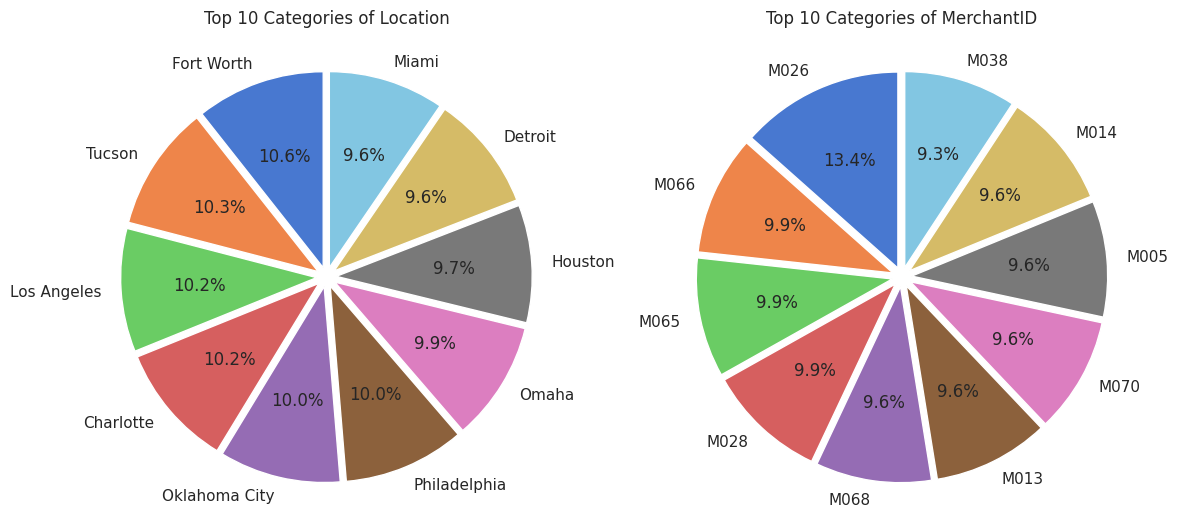

In [14]:
def plot_top_categories_pie_charts(columns, data=data, palette='muted'):
    plt.figure(figsize=(len(columns) * 6, 6))

    # Loop through each column and create a pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)

        # Get the top 10 categories based on frequency
        top_categories = data[column_name].value_counts().nlargest(10)

        # Plot the pie chart
        top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                                 startangle=90, explode=[0.05] * len(top_categories))

        plt.title(f'Top 10 Categories of {column_name}')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['Location', 'MerchantID']
plot_top_categories_pie_charts(columns_to_plot)

Number of high-value transactions (top 5%): 123


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Month
33,TX000034,AC00359,877.81,2023-03-13 17:23:24,Debit,Los Angeles,D000111,134.140.85.231,M094,Online,22,Student,150,1,399.00,2024-11-04 08:07:50,3
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,20,Student,24,1,605.95,2024-11-04 08:06:51,10
82,TX000083,AC00236,922.55,2023-01-23 16:32:48,Debit,Detroit,D000206,21.97.154.92,M004,ATM,63,Retired,87,1,4715.84,2024-11-04 08:11:07,1
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,54,Engineer,30,1,8654.28,2024-11-04 08:06:53,9
96,TX000097,AC00348,858.63,2023-04-18 17:27:23,Credit,San Francisco,D000019,175.230.206.232,M002,Branch,27,Student,185,1,1872.96,2024-11-04 08:10:47,4


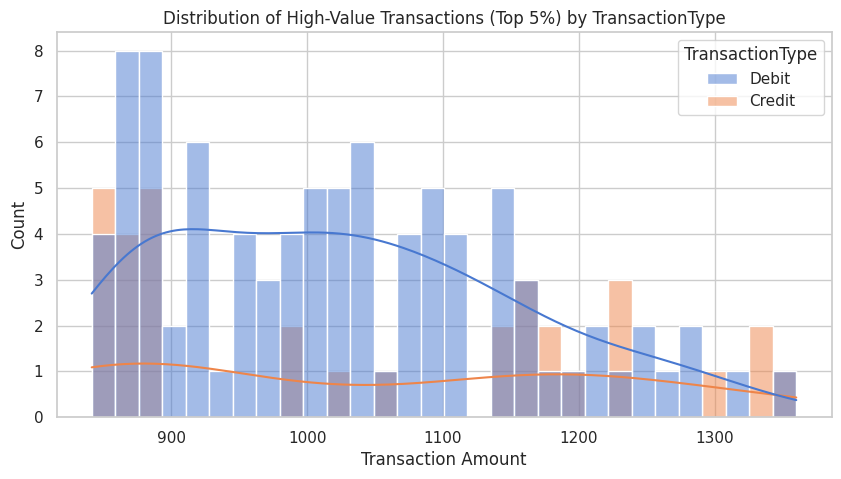

In [15]:
high_value_threshold = data['TransactionAmount'].quantile(0.95)
high_value_transactions = data[data['TransactionAmount'] > high_value_threshold]
print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

# Plot high-value transactions
# Adding TransactionType as hue for high-value transactions
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='TransactionType', palette='muted')
plt.title('Distribution of High-Value Transactions (Top 5%) by TransactionType')
plt.xlabel('Transaction Amount')
plt.show()

  Channel TransactionType  Count
0     ATM          Credit     71
1     ATM           Debit    738
2  Branch          Credit    249
3  Branch           Debit    606
4  Online          Credit    242
5  Online           Debit    554


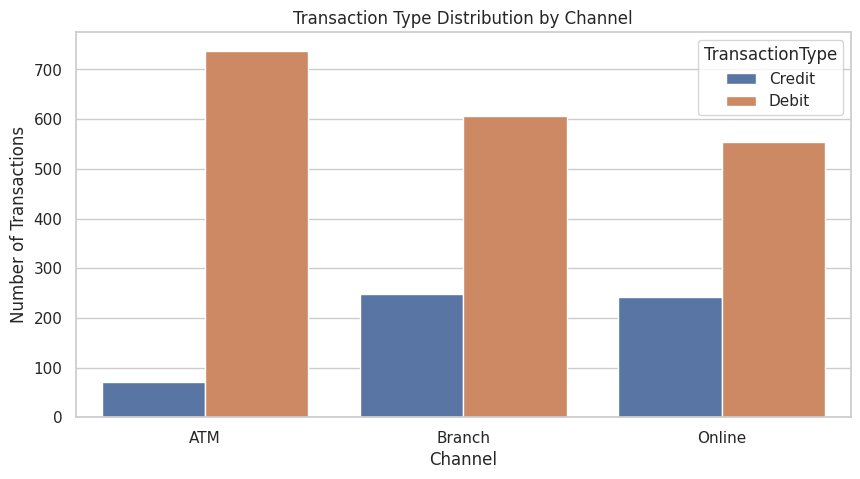

In [16]:
# Analyze fraud likelihood by channel and transaction type
channel_analysis = data.groupby(['Channel', 'TransactionType'])['TransactionID'].count().reset_index()
channel_analysis.columns = ['Channel', 'TransactionType', 'Count']
print(channel_analysis)

# Plot distribution of transactions by channel and type
plt.figure(figsize=(10, 5))
sns.barplot(data=channel_analysis, x='Channel', y='Count', hue='TransactionType')
plt.title('Transaction Type Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Transactions')
plt.show()

In [17]:
# Step 1: Prepare the data
# For Classification: Predict TransactionType (Debit or Credit)
# For Regression: Predict TransactionAmount

# Uncomment the respective lines based on your objective
target_column = 'TransactionType'  # Use 'TransactionAmount' for regression

X = data.drop(['TransactionType', 'TransactionAmount', 'TransactionID', 'AccountID',
               'TransactionDate', 'IP Address', 'PreviousTransactionDate'], axis=1)
y = data[target_column]

# Convert categorical target (classification)
if target_column == 'TransactionType':
    y = y.map({'Debit': 0, 'Credit': 1})  # Encode labels for classification

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

In [18]:
# Step 2: Define Models
models = {
    'Linear Regression': LinearRegression() if target_column == 'TransactionAmount' else None,
    'Logistic Regression': LogisticRegression(max_iter=1000) if target_column == 'TransactionType' else None,
    'Decision Tree': DecisionTreeClassifier() if target_column == 'TransactionType' else DecisionTreeRegressor(),
    'Random Forest': RandomForestClassifier(n_estimators=100) if target_column == 'TransactionType' else RandomForestRegressor(n_estimators=100)
}

In [19]:
# Logistic Regression
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression(max_iter=1000))])

# Train the model
logistic_pipeline.fit(X_train, y_train)

# Make predictions
logistic_pred = logistic_pipeline.predict(X_test)

# Evaluate
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_report = classification_report(y_test, logistic_pred)

print("Model: Logistic Regression")
print(f"Accuracy: {logistic_accuracy}")
print(f"Report:\n{logistic_report}")
print("-" * 40)


Model: Logistic Regression
Accuracy: 0.7520325203252033
Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       376
           1       0.40      0.10      0.16       116

    accuracy                           0.75       492
   macro avg       0.59      0.53      0.51       492
weighted avg       0.69      0.75      0.69       492

----------------------------------------


In [20]:
# Decision Tree
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeClassifier())])

# Train the model
decision_tree_pipeline.fit(X_train, y_train)

# Make predictions
decision_tree_pred = decision_tree_pipeline.predict(X_test)

# Evaluate
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_report = classification_report(y_test, decision_tree_pred)

print("Model: Decision Tree")
print(f"Accuracy: {decision_tree_accuracy}")
print(f"Report:\n{decision_tree_report}")
print("-" * 40)



Model: Decision Tree
Accuracy: 0.6991869918699187
Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       376
           1       0.31      0.22      0.26       116

    accuracy                           0.70       492
   macro avg       0.54      0.53      0.54       492
weighted avg       0.67      0.70      0.68       492

----------------------------------------


In [21]:
# Random Forest
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier(n_estimators=100))])

# Train the model
random_forest_pipeline.fit(X_train, y_train)

# Make predictions
random_forest_pred = random_forest_pipeline.predict(X_test)

# Evaluate
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_report = classification_report(y_test, random_forest_pred)

print("Model: Random Forest")
print(f"Accuracy: {random_forest_accuracy}")
print(f"Report:\n{random_forest_report}")
print("-" * 40)


Model: Random Forest
Accuracy: 0.766260162601626
Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       376
           1       0.60      0.03      0.05       116

    accuracy                           0.77       492
   macro avg       0.68      0.51      0.46       492
weighted avg       0.73      0.77      0.67       492

----------------------------------------


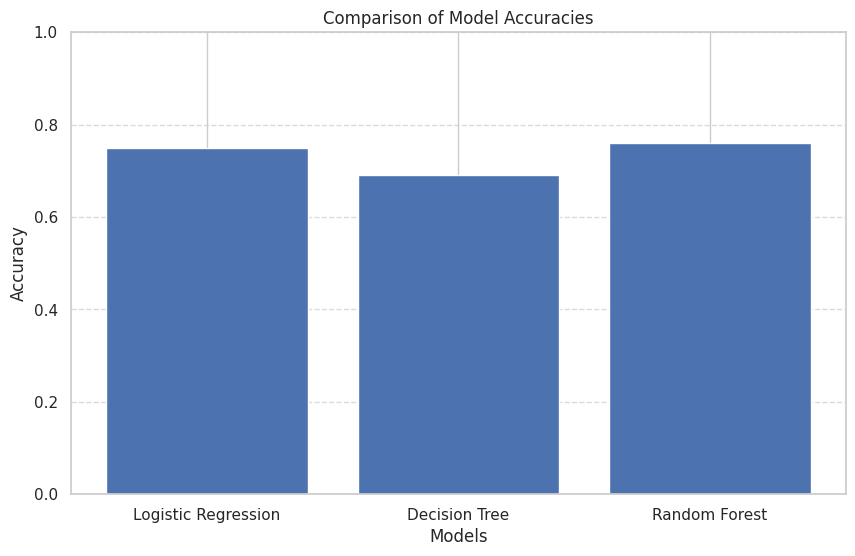

In [26]:
results = {
    "Logistic Regression": {"Accuracy": 0.75, "Precision": 0.77, "Recall": 0.95},
    "Decision Tree": {"Accuracy": 0.69, "Precision": 0.78, "Recall": 0.85},
    "Random Forest": {"Accuracy": 0.76, "Precision": 0.77, "Recall": 0.99},
}
# Extracting accuracies from the results dictionary dynamically
model_accuracies = {model: metrics['Accuracy'] for model, metrics in results.items()}

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values())

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Adjust y-axis limits to cover the full range of accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()

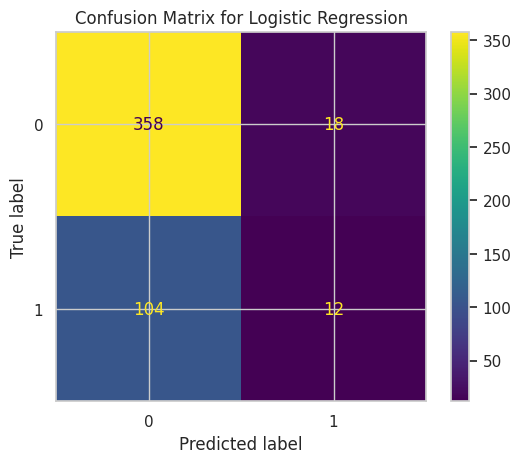

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logistic_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


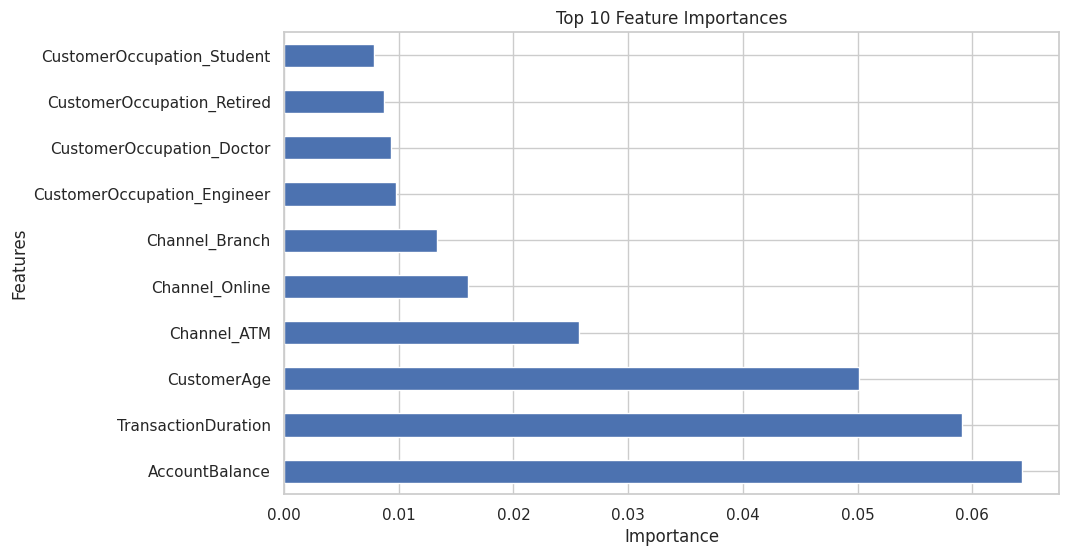

In [28]:
# Retrieve feature names from the preprocessor
num_features = preprocessor.transformers_[0][2]  # Numerical features
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(preprocessor.transformers_[1][2])  # Encoded categorical features

# Combine numerical and categorical feature names
all_features = list(num_features) + list(cat_features)

# Create a Pandas Series with feature importances
importances = random_forest_pipeline.named_steps['model'].feature_importances_
feature_importance = pd.Series(importances, index=all_features)

# Plot the top 10 most important features
feature_importance.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
